# Segmentación 

In [3]:
#Librerias
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
import cv2 as cv

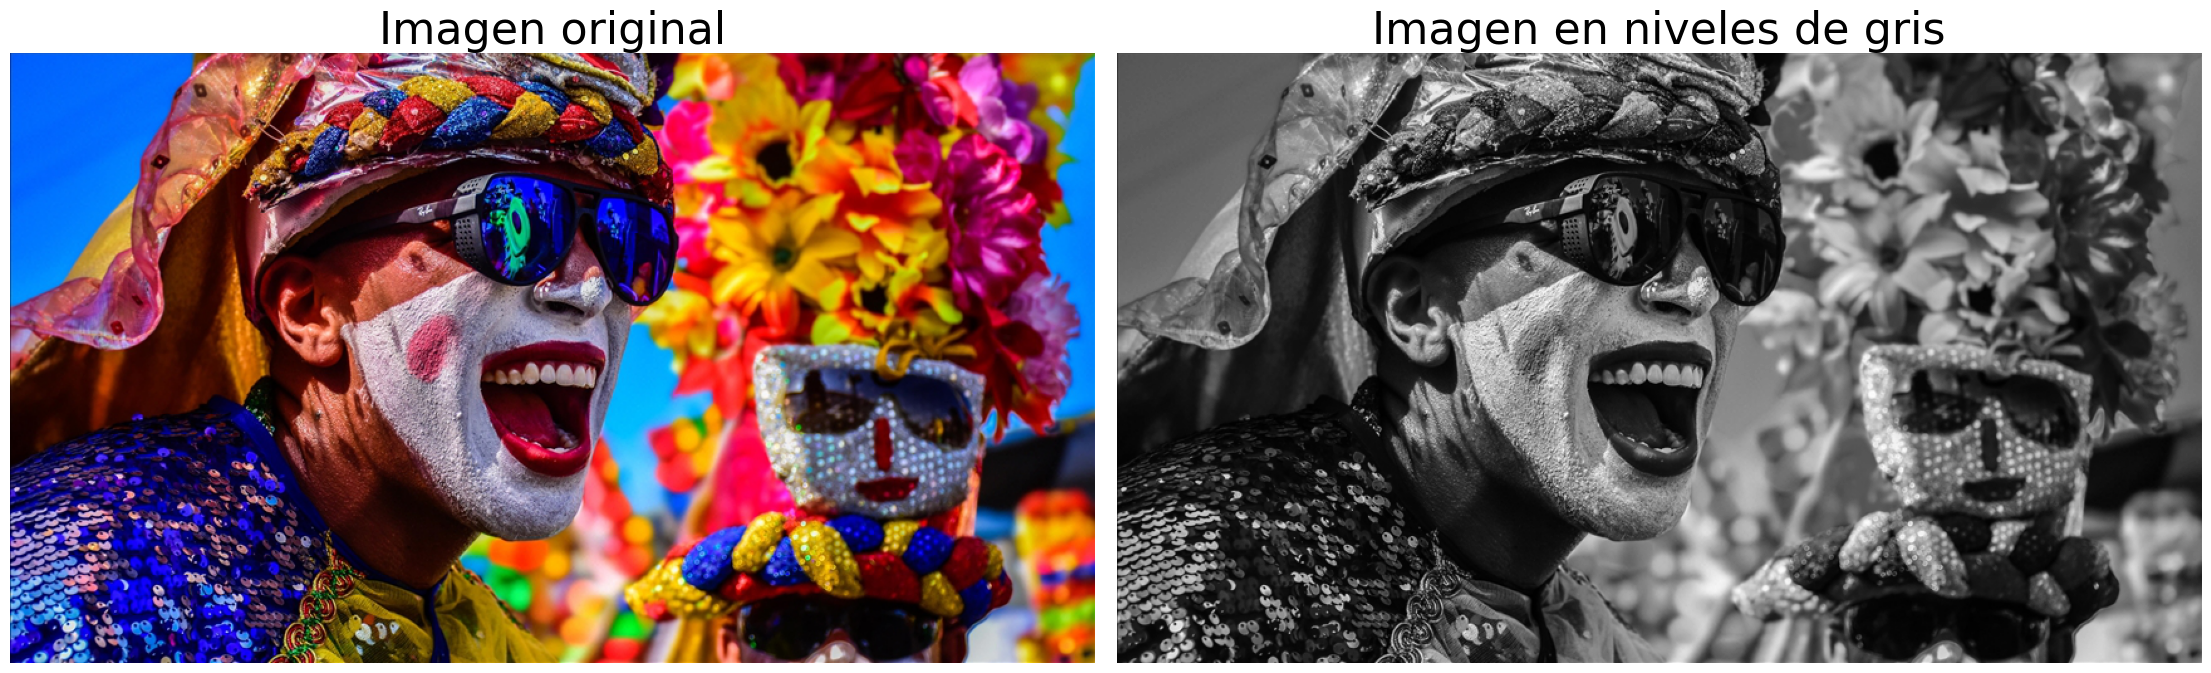

In [4]:
#Leer una imagen
Imagen = io.imread('carnaval_2.jpg')

#Cargamos los diferentes planos de la imageny visualizamos el plano rojo, posteriormente elegimos solo ese plano para 
#calcular el histograma
R = Imagen[:,:,2]  #uint8
G = Imagen[:,:,1]  #uint8
B = Imagen[:,:,0]  #uint8

#También convertimos la imagen a gris

gray = cv.cvtColor(Imagen, cv.COLOR_RGB2GRAY)
#Visualización

fig, axes = plt.subplots(1, 2,
                         figsize=(22,21),constrained_layout=True)

# Plot 
im = axes[0].imshow(Imagen, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Imagen original', fontsize=32)

axes[1].imshow(gray, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Imagen en niveles de gris', fontsize=32)
plt.show()

In [3]:
#Veamos el histogrma de niveles de gris
def hist_plot(img):
     # Lista vacia para guardar el conteo
    # de cada valor de intensidad
    count =[]
    # Lista vacia para guardar el nivel de intensidad
    r = []
    # Bucle para recorreer los valores
    for k in range(0, 256):
        r.append(k)
        count1 = 0
    # Bucle para recorrer cada valor en la imagen
        for i in range(m):
            for j in range(n):
                if img[i, j]== k:
                    count1+= 1
        count.append(count1) 
    return (r, count)


In [4]:
#Matriz del tamaño de la imagen a la que se le quiere calcular el histograma
m, n = gray.shape
#Calculo del histograma del plano R de la imagen 
r, count = hist_plot(gray)

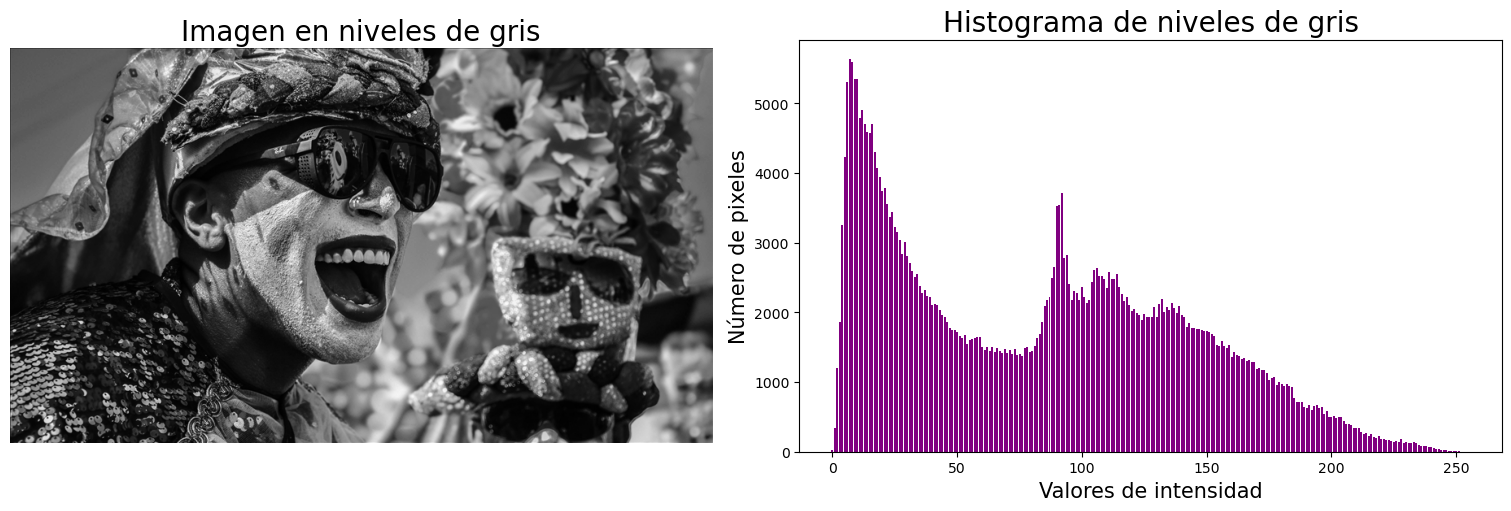

In [5]:
fig, axes = plt.subplots(1, 2,
                         figsize=(15,5),constrained_layout=True)

# Plot 
im = axes[0].imshow(gray, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Imagen en niveles de gris', fontsize=20)

axes[1].bar(r, count, color='purple')
axes[1].set_title('Histograma de niveles de gris', fontsize=20)
axes[1].set_xlabel('Valores de intensidad', fontsize=15)
axes[1].set_ylabel('Número de pixeles', fontsize=15)
plt.show()

In [6]:
#AHORA EL HISTOGRAMA DE NIVELES DE GRIS DE LOS DIFERENTES PLANOS RGB
#R
mR, nR = R.shape
#Calculo del histograma del plano R de la imagen 
rR, countR = hist_plot(R)

#G
mG, nG = G.shape
#Calculo del histograma del plano G de la imagen 
rG, countG = hist_plot(G)

#R
mB, nB = B.shape
#Calculo del histograma del plano R de la imagen 
rB, countB = hist_plot(B)

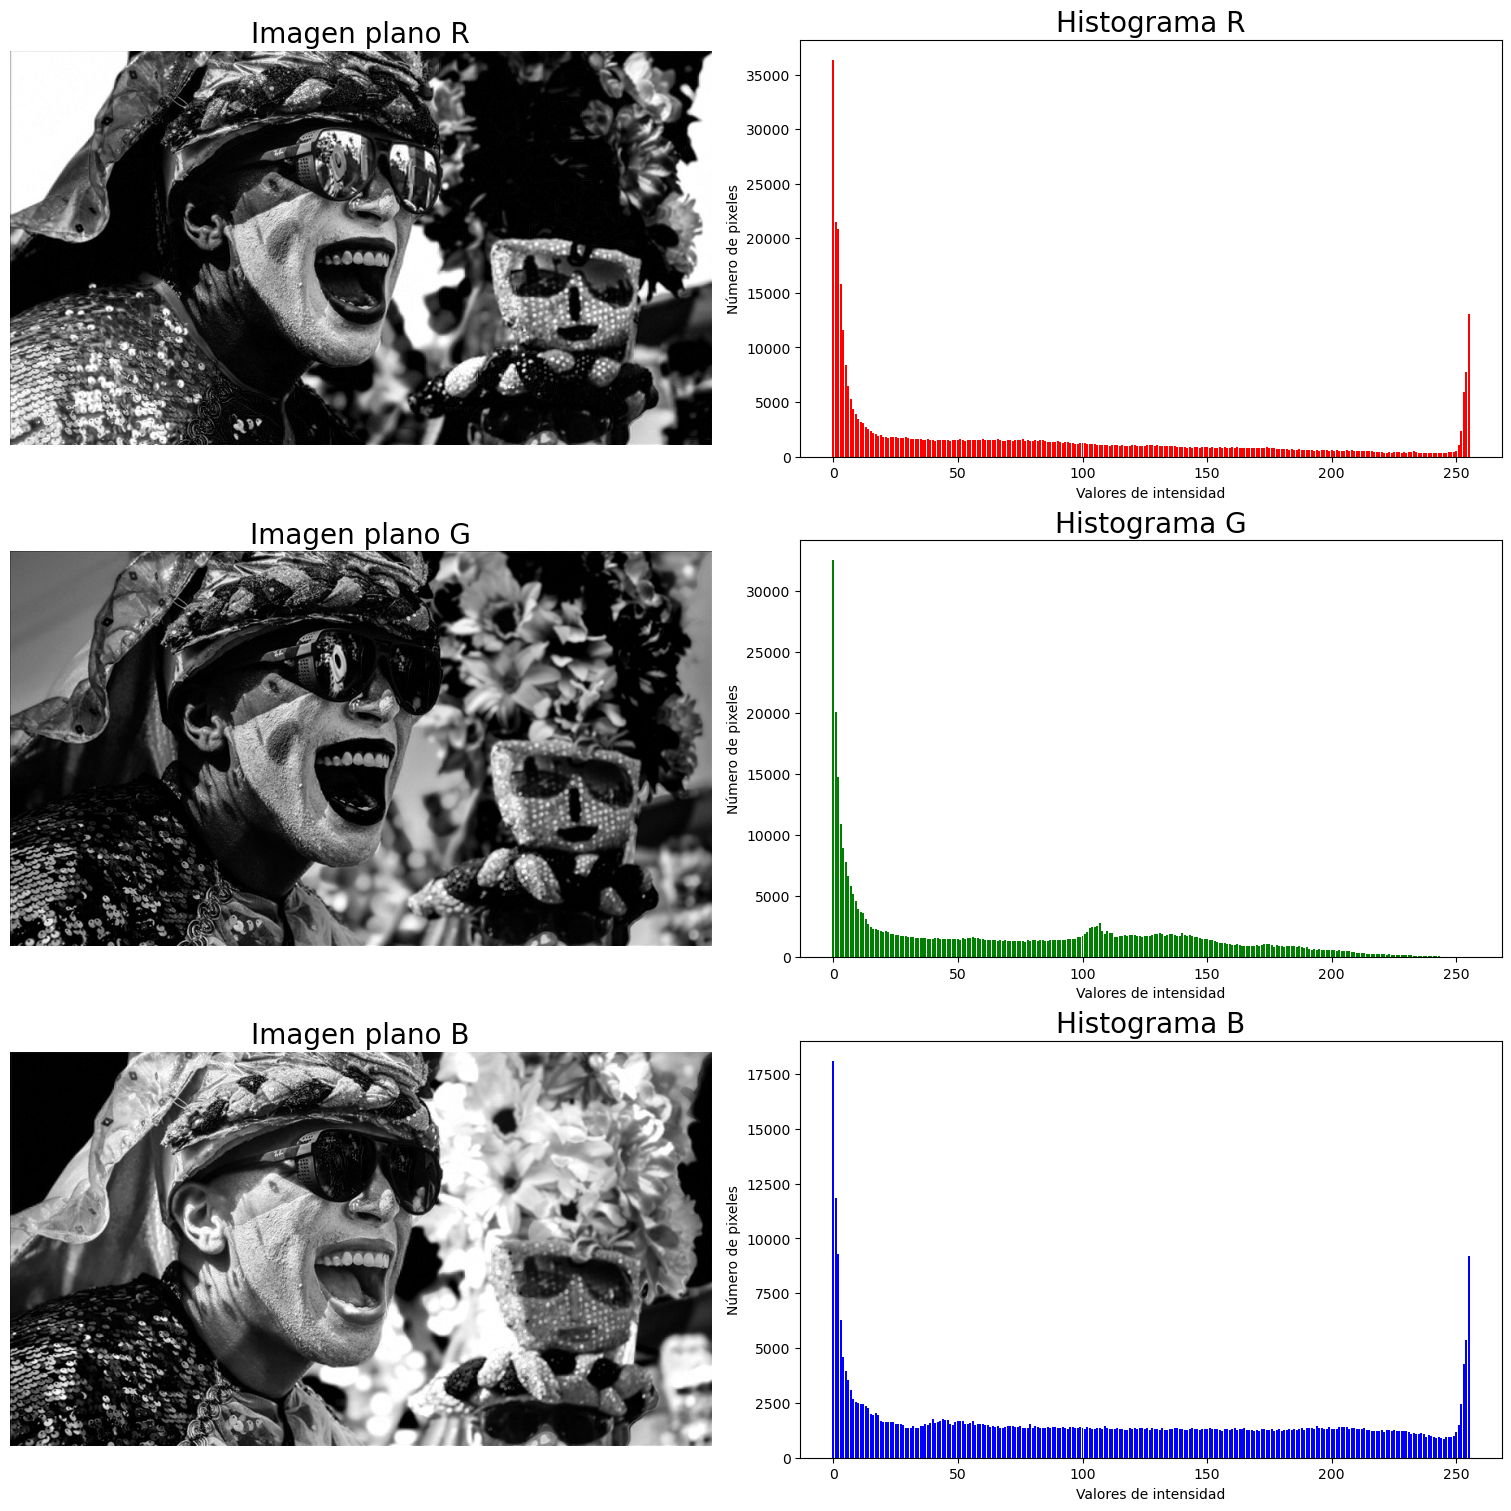

In [7]:
#Visualización R-G-B + HISTOGRAMAS

fig, axes = plt.subplots(3, 2,
                         figsize=(15,15),constrained_layout=True)

# Plot 
im = axes[0,0].imshow(R, cmap='gray')
axes[0,0].axis('off')
axes[0,0].set_title('Imagen plano R', fontsize=20)

axes[0,1].bar(rR, countR, color='red')
axes[0,1].set_title('Histograma R', fontsize=20)
axes[0,1].set_xlabel('Valores de intensidad')
axes[0,1].set_ylabel('Número de pixeles')


axes[1,0].imshow(G, cmap='gray')
axes[1,0].axis('off')
axes[1,0].set_title('Imagen plano G', fontsize=20)

axes[1,1].bar(rG, countG, color='green')
axes[1,1].set_title('Histograma G', fontsize=20)
axes[1,1].set_xlabel('Valores de intensidad')
axes[1,1].set_ylabel('Número de pixeles')

axes[2,0].imshow(B, cmap='gray')
axes[2,0].axis('off')
axes[2,0].set_title('Imagen plano B', fontsize=20)

axes[2,1].bar(rB, countB, color='blue')
axes[2,1].set_title('Histograma B', fontsize=20)
axes[2,1].set_xlabel('Valores de intensidad')
axes[2,1].set_ylabel('Número de pixeles')

plt.show()

In [3]:
#Sergmentación manual 1 umbral
def segmentar1(image):
    (n,m) = image.shape
    for f in range (0,n):
        for c in range (0,m):
            if image[f,c] <= 50:
                image[f,c] = 0
            else:
                image[f,c]= 255
    return image

Text(0.5, 1.0, 'Un umbral - manual')

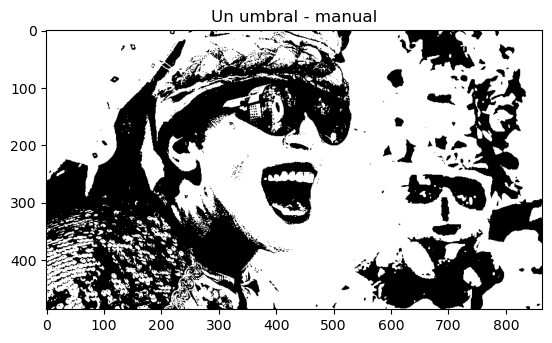

In [4]:
#Aplicamos la segmentación manual a la imagen gris
seg1_manual = segmentar1(gray)
plt.imshow(seg1_manual, cmap='gray')
plt.title('Un umbral - manual')

In [3]:
#Sergmentación manual 2 umbrales
def segmentar2(image):
    (n,m) = image.shape
    for f in range (0,n):
        for c in range (0,m):
            if image[f,c] < 50:
                image[f,c] = 0
            elif image[f,c] <=50 or image[f,c] <= 100:
                image[f,c] = 150
            else:
                image[f,c] = 255
    return image

Text(0.5, 1.0, 'Dos umbrales - manual')

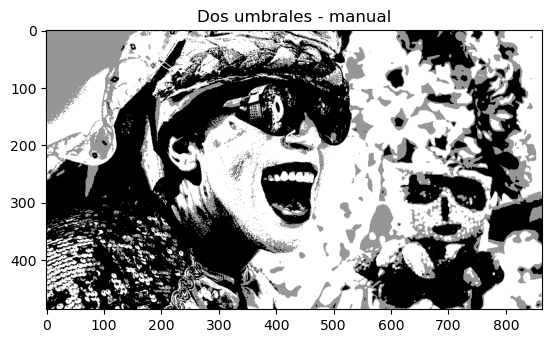

In [4]:
#Aplicamos la segmentación manual a la imagen gris
seg2_manual = segmentar2(gray)
plt.imshow(seg2_manual, cmap='gray')
plt.title('Dos umbrales - manual')

Umbrales calculados por la función:  [ 62 131]


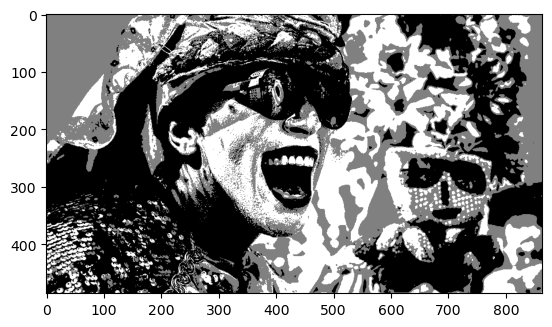

In [14]:
#Otra manera de hacer segmentación múltiple es con la libreria skimage usando la función multi_otsu
import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu

# Imagen de entrada: Gris o uno de los planos de la imagen
#La imagen en escala de gris debe ser guardada de nuevo, ya que los valores de aplicar las funciones anteriores
#se sobreescriben
image = cv.cvtColor(Imagen, cv.COLOR_RGB2GRAY)


# Aplicar umbral multi-Otsu para el valor predeterminado, generando
# tres clases por defecto, es decir, 2 umbrales, para especificar el número de clases, escribimos: 
#thresholds = threshold_multiotsu(image, classes = #)
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

plt.imshow(regions, cmap='gray')
print('Umbrales calculados por la función: ', thresholds)

Text(0.5, 1.0, 'Segmentación en cada plano de color con Otsu - Uniendo segmentación en planos individuales')

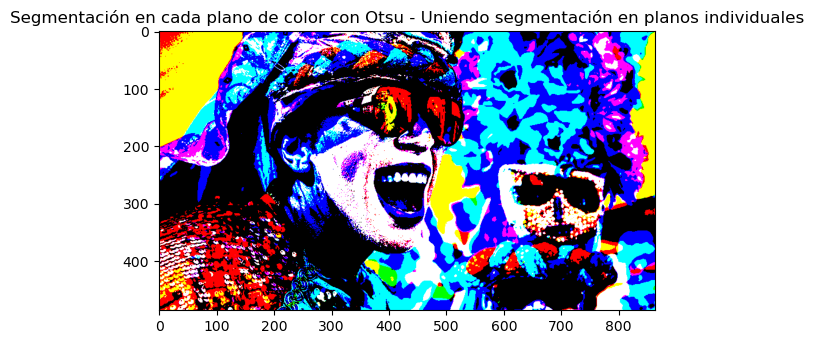

In [4]:
import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu

#Ahora, veamos la manera de segmentar los tres planos individales con Otsu y luego concatenar
#OTSU R
bOR , imgBinOR = cv.threshold(R, 100 ,255, cv.THRESH_BINARY)
#OTSU G
bOG , imgBinOG = cv.threshold(G, 100,255, cv.THRESH_BINARY)
#OTSU B
bOB , imgBinOB = cv.threshold(B, 100,255, cv.THRESH_BINARY)

#CONCATENACIÓN
conc_otsu_rgb = np.dstack((imgBinOR,imgBinOG,imgBinOB))
plt.imshow(conc_otsu_rgb)
plt.title('Segmentación en cada plano de color con Otsu - Uniendo segmentación en planos individuales')

In [13]:
#Segmentación con diferentes máscaras por plano
#R
lower_maskR = Imagen[:,:,2] > 50
upper_maskR = Imagen[:,:,2] < 100
maskR = upper_maskR*lower_maskR

#G
lower_maskG = Imagen[:,:,1] > 100
upper_maskG = Imagen[:,:,1] < 200
maskG = upper_maskG*lower_maskG

#B
lower_maskB = Imagen[:,:,0] > 10
upper_maskB = Imagen[:,:,0] < 100
maskB = upper_maskB*lower_maskB

#CONCATENACIÓN
conc_otsu_rgb_X = np.dstack((R*maskR,G*maskG,B*maskB))
#plt.imshow(conc_otsu_rgb_X)
#plt.title('Segmentación en cada plano de color con Otsu - Uniendo segmentación en planos individuales')

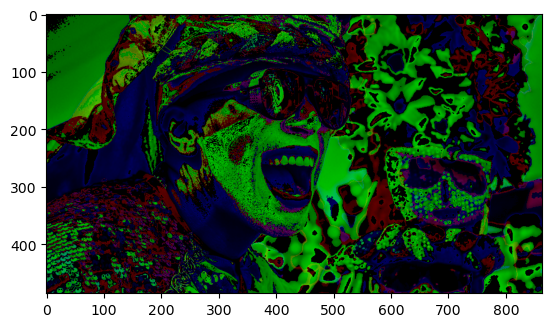

In [14]:
plt.imshow(conc_otsu_rgb_X)